In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Default_Fin.csv', index_col='Index')
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
Index,,,,
1,1,8754.36,532339.56,0
2,0,9806.16,145273.56,0
3,1,12882.60,381205.68,0
4,1,6351.00,428453.88,0
5,1,9427.92,461562.00,0


# Exploratory Data Analysis

<Axes: xlabel='Employed', ylabel='count'>

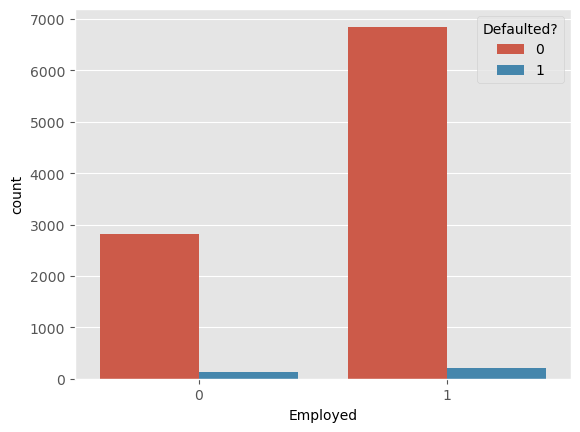

In [3]:
sns.countplot(df, x='Employed', hue='Defaulted?')

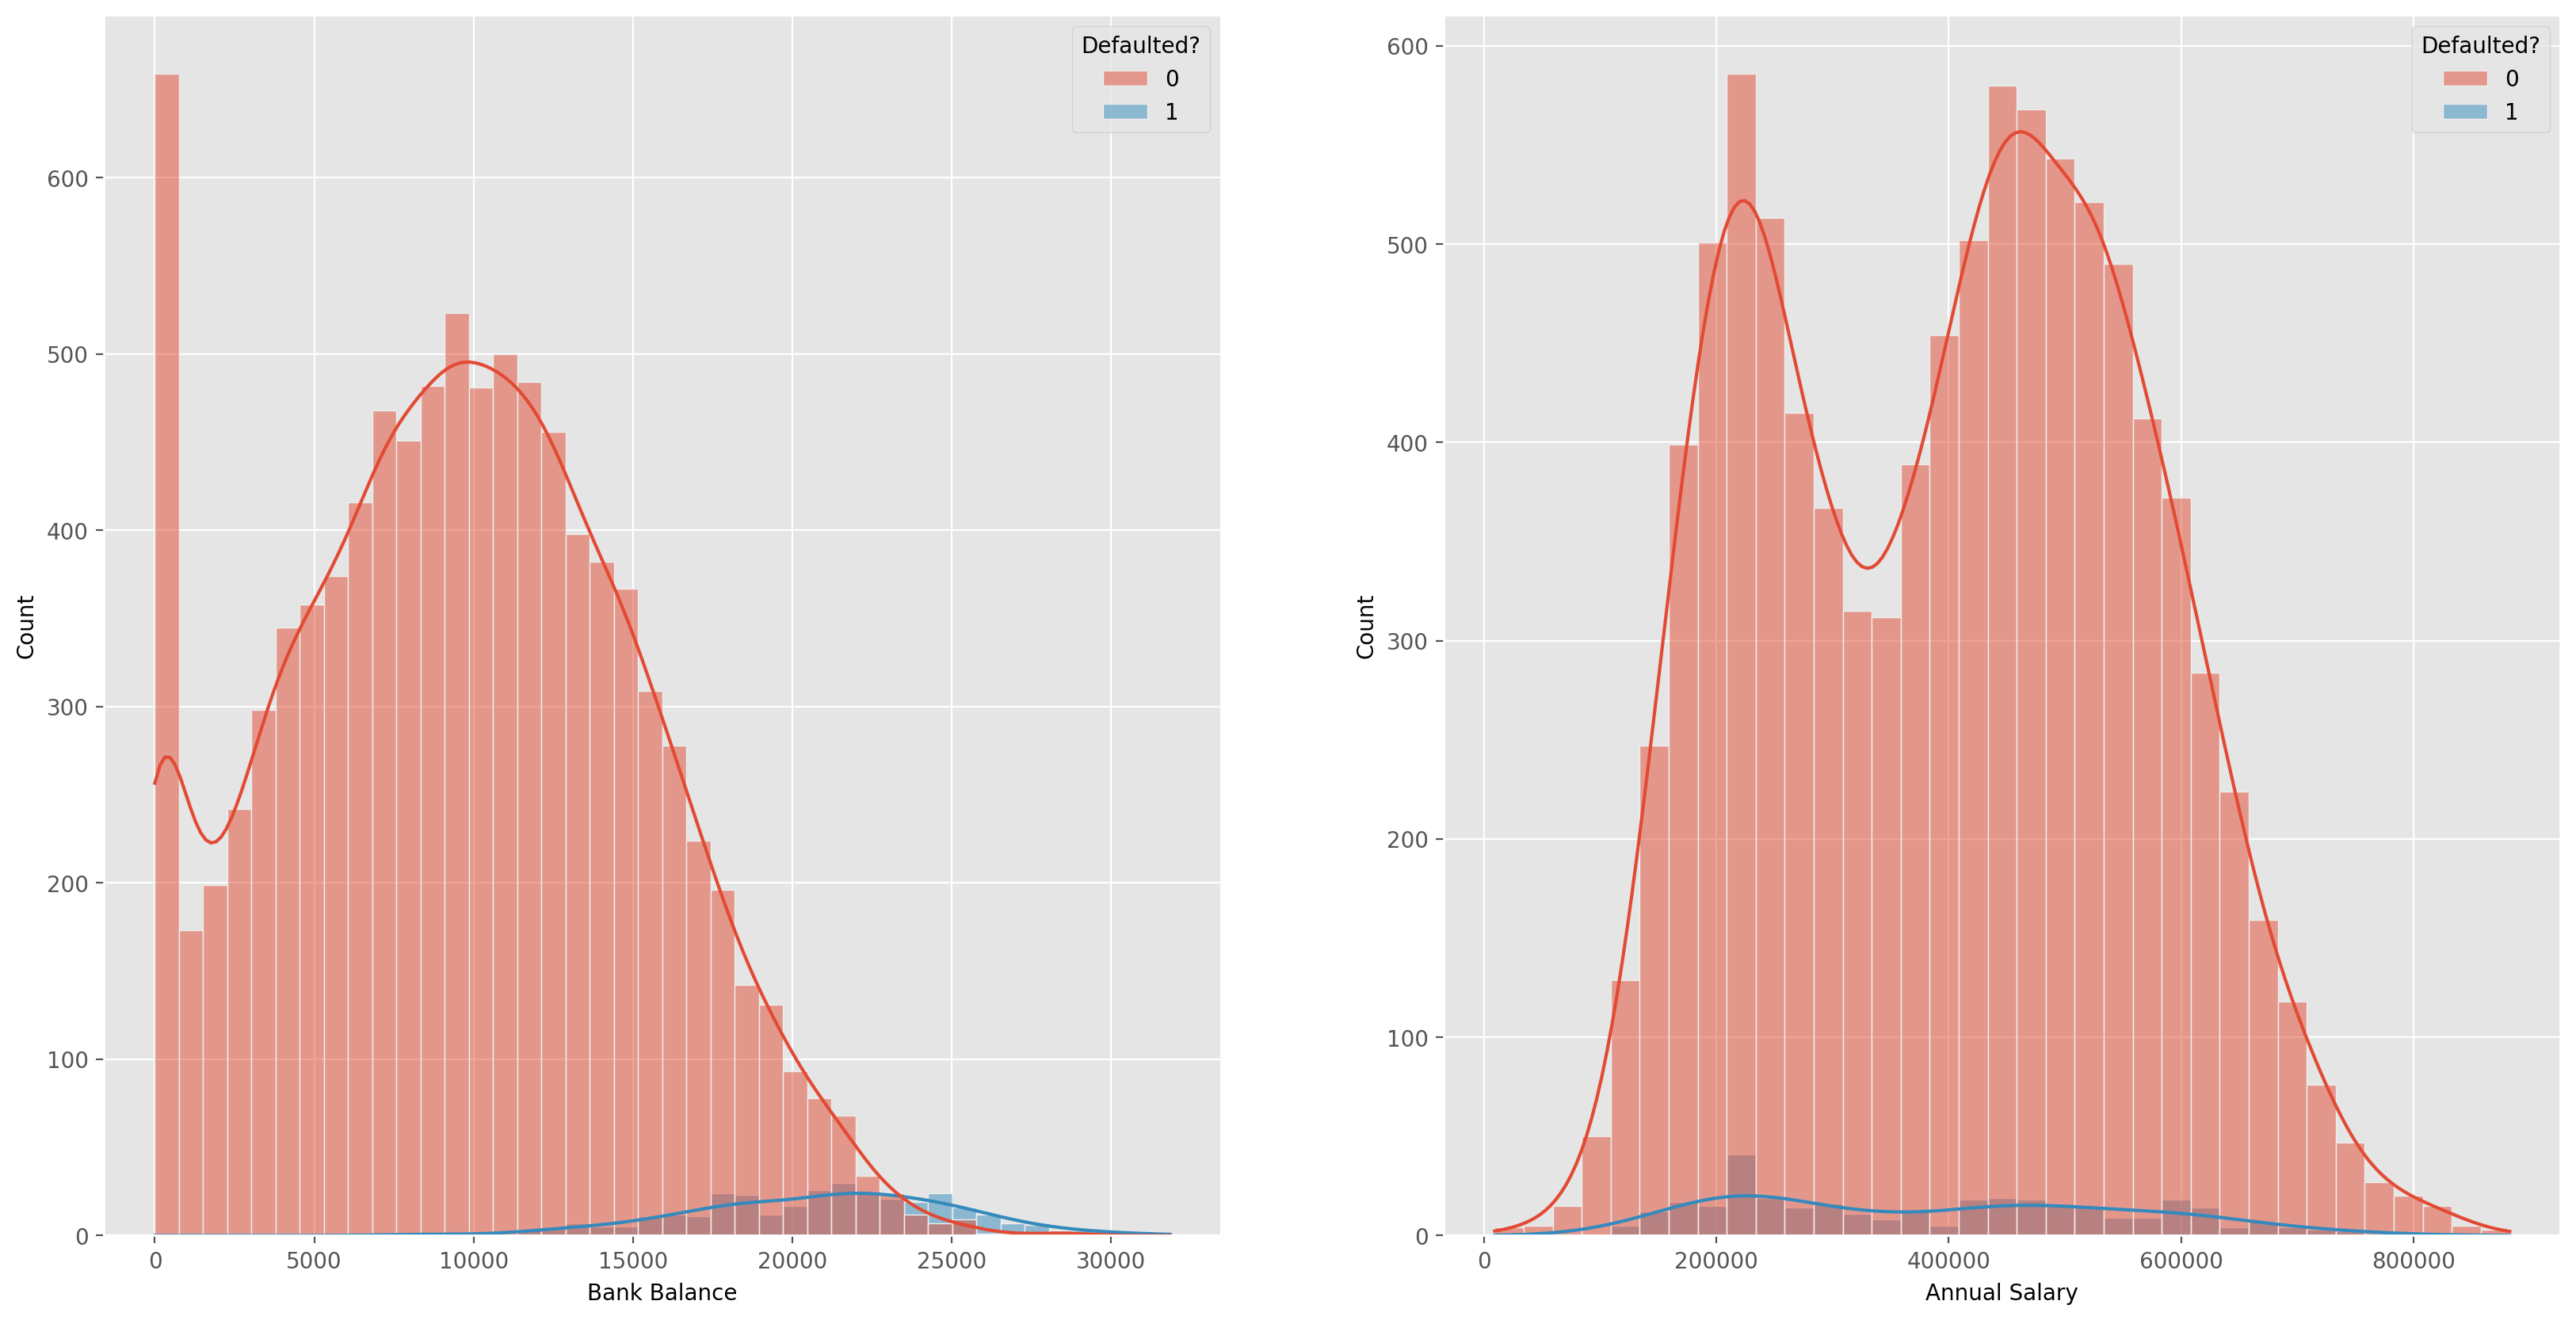

In [4]:
num_cols = ['Bank Balance', 'Annual Salary']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=200)
ax = ax.flatten()

for i, var in enumerate(num_cols):
    sns.histplot(df, x=var, hue='Defaulted?', kde=True, ax=ax[i])
    
plt.show()

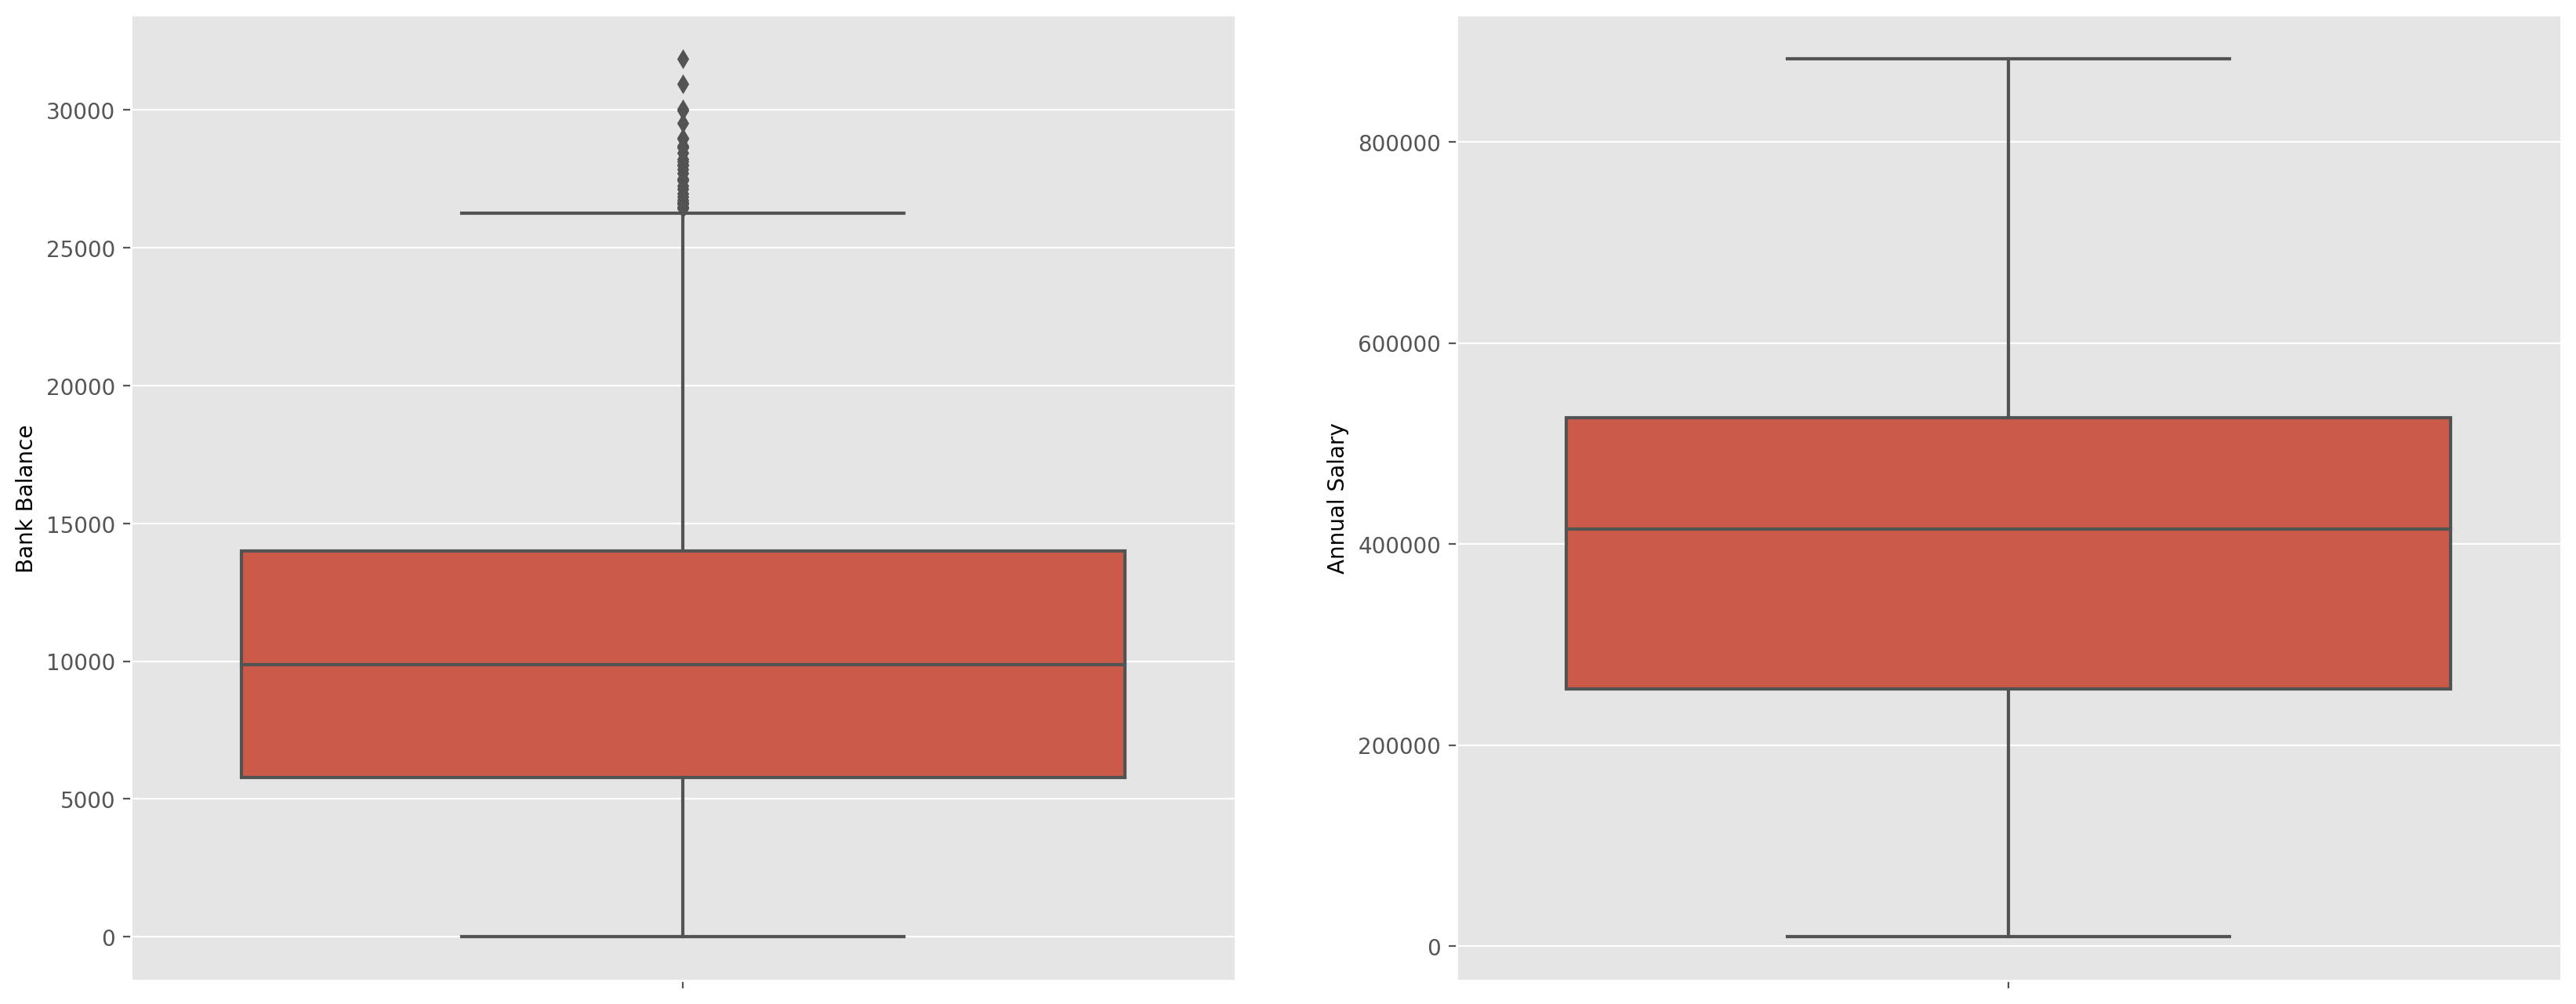

In [5]:
num_cols = ['Bank Balance', 'Annual Salary']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=200)
ax = ax.flatten()

for i, var in enumerate(num_cols):
    sns.boxplot(df, y=var, ax=ax[i])
    
plt.show()

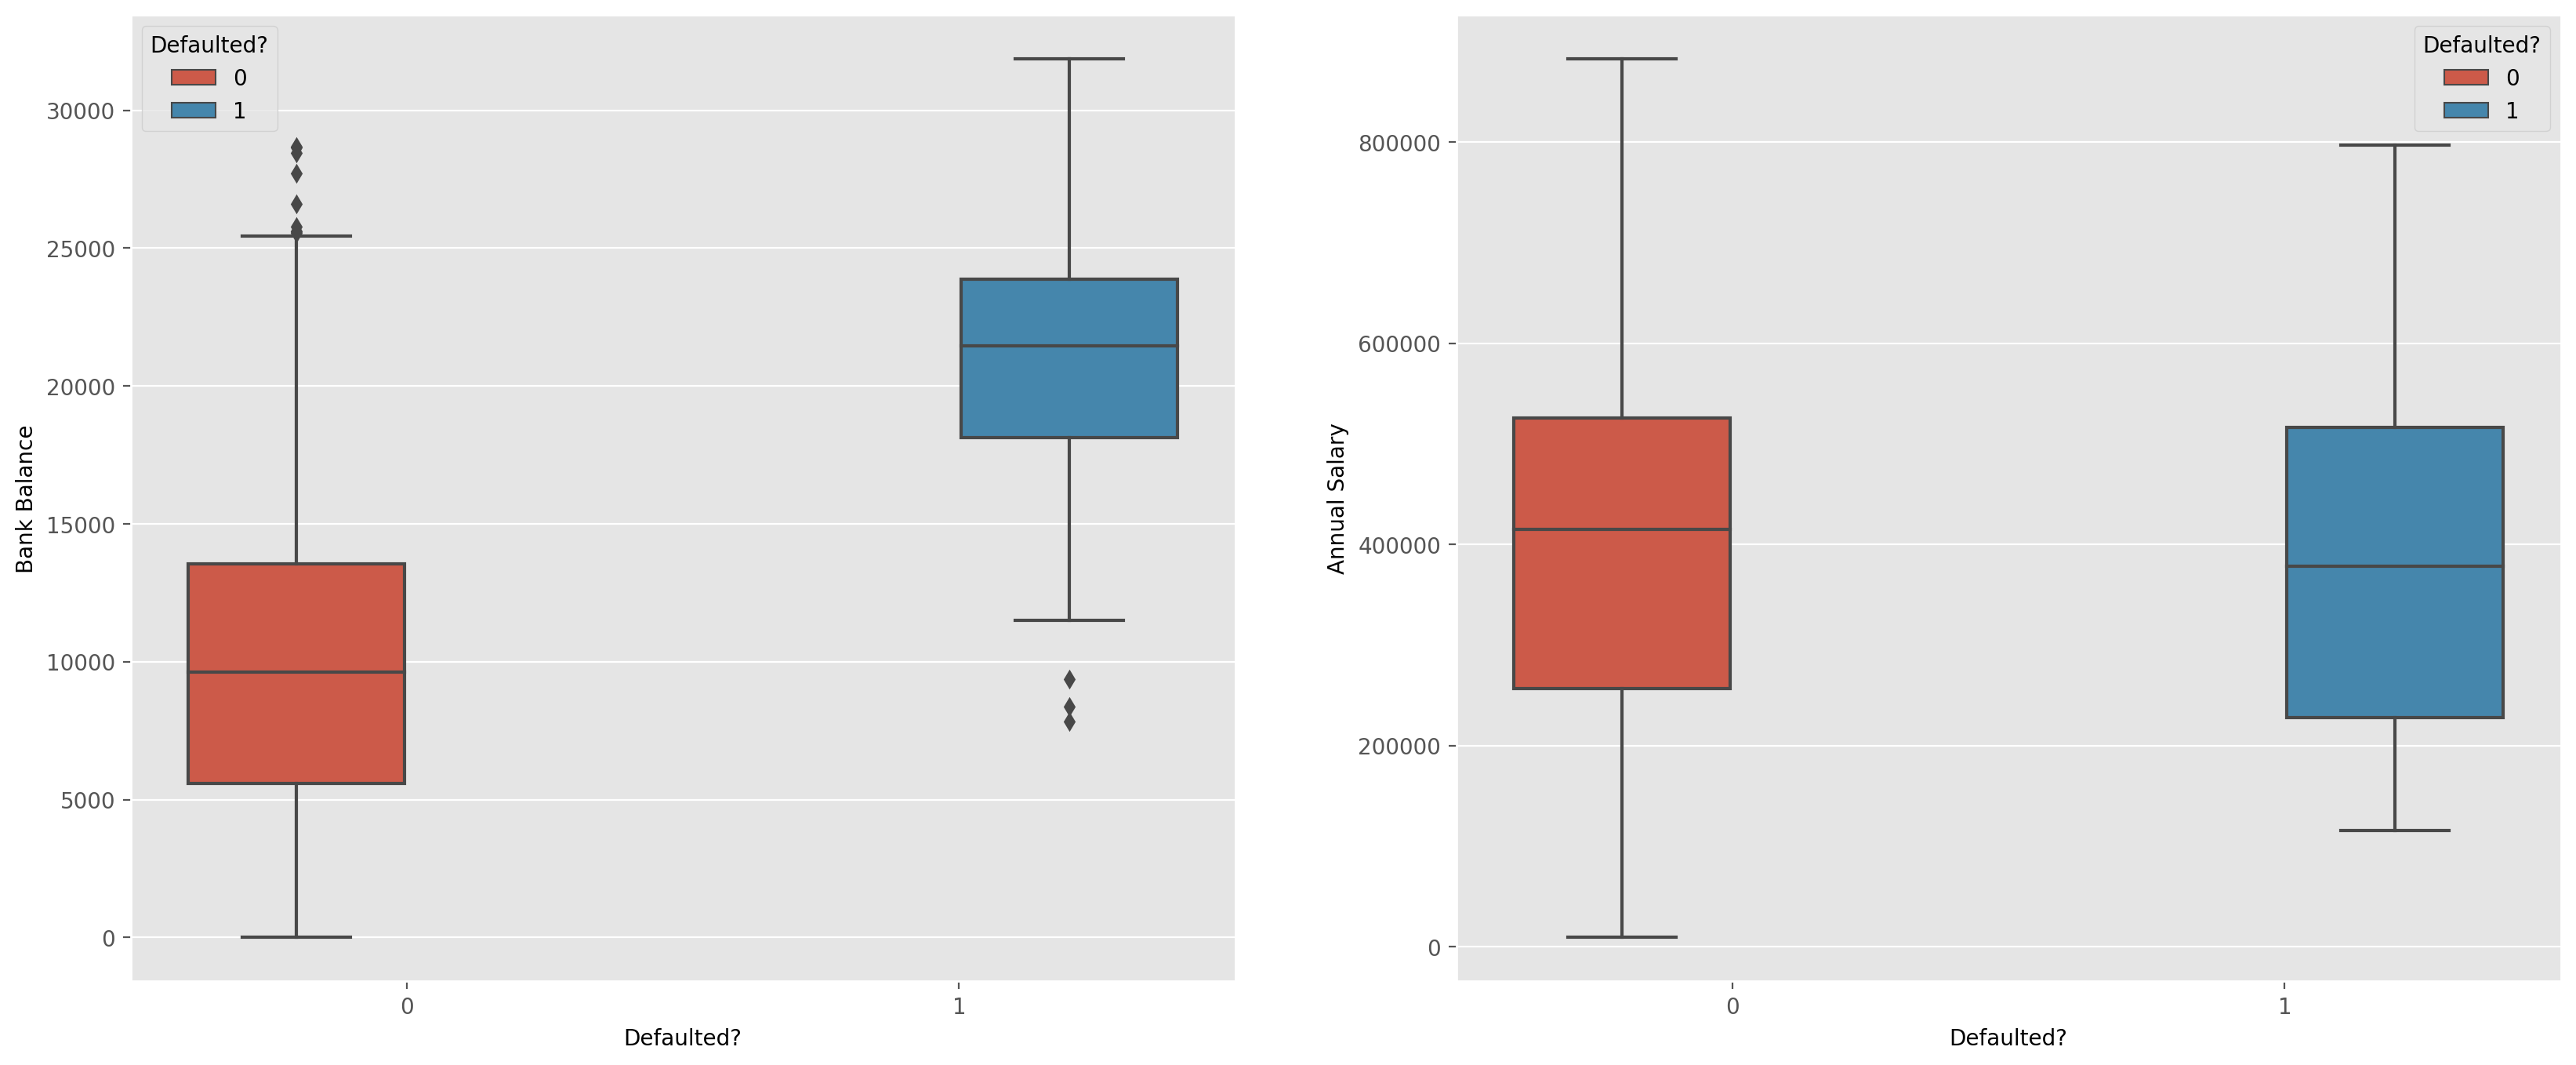

In [6]:
num_cols = ['Bank Balance', 'Annual Salary']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=200)
ax = ax.flatten()

for i, var in enumerate(num_cols):
    sns.boxplot(data=df, x='Defaulted?', y=var, ax=ax[i], hue='Defaulted?')
    
plt.show()

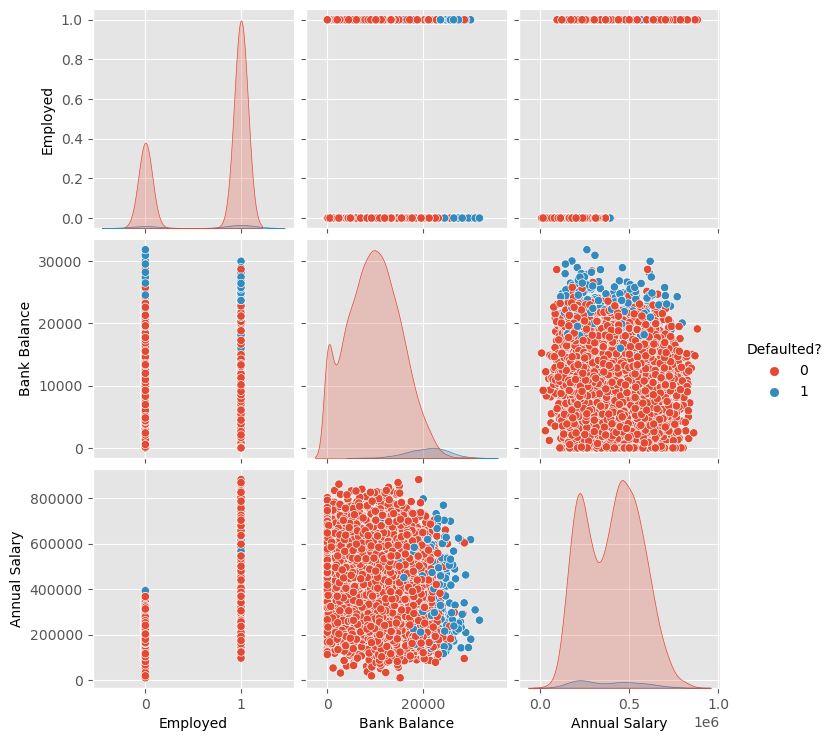

In [7]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['figure.dpi'] = 100

sns.pairplot(data=df, diag_kind='kde', hue='Defaulted?')

# Data Preprocessing

In [8]:
df.isnull().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X = df.drop('Defaulted?', axis=1)
y = df['Defaulted?']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
cols_to_standardize = ['Bank Balance', 'Annual Salary']

scaler = StandardScaler()

X_train[cols_to_standardize] = scaler.fit_transform(X_train[cols_to_standardize])

X_test[cols_to_standardize] = scaler.transform(X_test[cols_to_standardize])

# Model Building & Evaluation

In [14]:
from lazypredict.Supervised import LazyClassifier

In [15]:
clf = LazyClassifier()
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

pd.DataFrame(models)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:25<00:00,  2.13it/s]

[LightGBM] [Info] Number of positive: 266, number of negative: 7734
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033250 -> initscore=-3.369885
[LightGBM] [Info] Start training from score -3.369885


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:26<00:00,  1.08it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.82,0.84,0.84,0.88,0.03
AdaBoostClassifier,0.97,0.70,0.70,0.97,0.98
LGBMClassifier,0.97,0.66,0.66,0.96,1.02
CalibratedClassifierCV,0.97,0.65,0.65,0.97,1.14
LabelSpreading,0.97,0.65,0.65,0.97,7.52
LogisticRegression,0.97,0.65,0.65,0.97,0.08
LabelPropagation,0.97,0.65,0.65,0.97,8.48
XGBClassifier,0.97,0.65,0.65,0.96,0.80
DecisionTreeClassifier,0.96,0.65,0.65,0.96,0.06


## Ada Boost Classifier

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

In [27]:
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1933
           1       0.57      0.39      0.46        67

    accuracy                           0.97      2000
   macro avg       0.77      0.69      0.72      2000
weighted avg       0.97      0.97      0.97      2000



  0%|          | 0/2000 [00:00<?, ?it/s]

INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00048568  0.01151264 -0.0215509 ]
INFO:shap:phi = [-0.00048568 -0.01151264  0.0215509 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.00158086 -0.17205915 -0.09911479]
INFO:shap:phi = [0.00158086 0.17205915 0.09911479]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.00011997 0.01627791 0.03370314]
INFO:shap:phi = [-0.00011997 -0.01627791 -0.03370314]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01039778  0.06290948 -0.04758792]
INFO:shap:phi = [-0.01039778 -0.06290948  0.04758792]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [8.68669680e-05 2.29276384e-02 8.59071018e-02]
INFO:shap:phi = [-8.68669680e-05 -2.29276384e-02 -8.59071018e-02]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01035696  0.06388802 -0.04605062]
INFO:shap:phi = [-0.01035696 -0.06388802  0.04605062]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03805955  0.05186414  0.0715696 ]
INFO:shap:phi = [ 0.03805955 -0.05186414 -0.0715696 ]
INFO:shap:nu

INFO:shap:phi = [-0.01704575  0.03789595  0.06129048]
INFO:shap:phi = [ 0.01704575 -0.03789595 -0.06129048]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00255356 -0.10816538  0.00204234]
INFO:shap:phi = [-0.00255356  0.10816538 -0.00204234]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.00150279  0.064175    0.05446892]
INFO:shap:phi = [ 0.00150279 -0.064175   -0.05446892]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03483746 -0.11338324  0.06183894]
INFO:shap:phi = [ 0.03483746  0.11338324 -0.06183894]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.0015027   0.06412729  0.05451655]
INFO:shap:phi = [ 0.0015027  -0.06412729 -0.05451655]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03805252  0.0543943   0.06970372]
INFO:shap:phi = [ 0.03805252 -0.0543943  -0.06970372]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03688823  0.05027289  0.0458158 ]
INFO:shap:phi = [ 0.03688823 -0.05027289 -0.0458158 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0244850

INFO:shap:phi = [ 0.0107756   0.05216517 -0.0603486 ]
INFO:shap:phi = [-0.0107756  -0.05216517  0.0603486 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00988084  0.05185387 -0.00693224]
INFO:shap:phi = [-0.00988084 -0.05185387  0.00693224]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0005674  -0.04706055 -0.01181995]
INFO:shap:phi = [-0.0005674   0.04706055  0.01181995]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0005586  -0.02792868 -0.05899084]
INFO:shap:phi = [-0.0005586   0.02792868  0.05899084]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01011963  0.05134436 -0.01948253]
INFO:shap:phi = [-0.01011963 -0.05134436  0.01948253]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01864901  0.06754319 -0.03851349]
INFO:shap:phi = [-0.01864901 -0.06754319  0.03851349]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00061019  0.02248259 -0.05180081]
INFO:shap:phi = [-0.00061019 -0.02248259  0.05180081]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0099502

INFO:shap:phi = [-0.00898324 -0.06857287  0.00504635]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00703611 -0.01500191  0.05373263]
INFO:shap:phi = [-0.00703611  0.01500191 -0.05373263]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01542885 -0.08040443  0.02440163]
INFO:shap:phi = [ 0.01542885  0.08040443 -0.02440163]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.04203344  0.05839636 -0.00332329]
INFO:shap:phi = [ 0.04203344 -0.05839636  0.00332329]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00696285 -0.20787625  0.00628997]
INFO:shap:phi = [-0.00696285  0.20787625 -0.00628997]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00070844 -0.05207229 -0.1066976 ]
INFO:shap:phi = [-0.00070844  0.05207229  0.1066976 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00091991  0.00978093 -0.04544101]
INFO:shap:phi = [-0.00091991 -0.00978093  0.04544101]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.000834    0.02650842 -0.00833156]
INFO:shap:phi = [-0.000834 

INFO:shap:phi = [-0.01156503  0.00762611  0.04637837]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01028634  0.06365111 -0.04161641]
INFO:shap:phi = [-0.01028634 -0.06365111  0.04161641]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00972244 -0.03838469 -0.05511536]
INFO:shap:phi = [-0.00972244  0.03838469  0.05511536]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00860226 -0.30566909  0.12152767]
INFO:shap:phi = [-0.00860226  0.30566909 -0.12152767]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00039767 -0.01782802  0.05646539]
INFO:shap:phi = [-0.00039767  0.01782802 -0.05646539]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.02818553 -0.10460175  0.03503232]
INFO:shap:phi = [ 0.02818553  0.10460175 -0.03503232]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01900486  0.05346182  0.07807619]
INFO:shap:phi = [ 0.01900486 -0.05346182 -0.07807619]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01608304 -0.04374441  0.06391286]
INFO:shap:phi = [ 0.0160830

INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00181836 -0.13401592  0.00789098]
INFO:shap:phi = [-0.00181836  0.13401592 -0.00789098]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.0165438  -0.06554874  0.10236791]
INFO:shap:phi = [ 0.0165438   0.06554874 -0.10236791]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01029827  0.06283776 -0.04164911]
INFO:shap:phi = [-0.01029827 -0.06283776  0.04164911]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01697718  0.03553594  0.06525977]
INFO:shap:phi = [ 0.01697718 -0.03553594 -0.06525977]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.0110581  -0.04673302  0.04972373]
INFO:shap:phi = [ 0.0110581   0.04673302 -0.04972373]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00989776  0.05916594 -0.0153864 ]
INFO:shap:phi = [-0.00989776 -0.05916594  0.0153864 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00059562  0.02331607 -0.03565662]
INFO:shap:phi = [-0.00059562 -0.02331607  0.03565662]
INFO:shap:num_full_subsets 

INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00728077 -0.07218806  0.01745415]
INFO:shap:phi = [-0.00728077  0.07218806 -0.01745415]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00961073  0.06038266 -0.00221071]
INFO:shap:phi = [-0.00961073 -0.06038266  0.00221071]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.00975054 -0.14249052  0.02977016]
INFO:shap:phi = [ 0.00975054  0.14249052 -0.02977016]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01142061 -0.03753357  0.02973079]
INFO:shap:phi = [ 0.01142061  0.03753357 -0.02973079]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03027397 -0.09388058  0.14900791]
INFO:shap:phi = [ 0.03027397  0.09388058 -0.14900791]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01163624 -0.01846013 -0.04046822]
INFO:shap:phi = [-0.01163624  0.01846013  0.04046822]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01864901  0.06754319 -0.03851349]
INFO:shap:phi = [-0.01864901 -0.06754319  0.03851349]
INFO:shap:num_full_subsets 

INFO:shap:phi = [ 0.00934092  0.0668579  -0.0224129 ]
INFO:shap:phi = [-0.00934092 -0.0668579   0.0224129 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01029868  0.06351077 -0.04217482]
INFO:shap:phi = [-0.01029868 -0.06351077  0.04217482]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00098461  0.00766985 -0.10988836]
INFO:shap:phi = [-0.00098461 -0.00766985  0.10988836]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00645731 -0.02446804  0.07303452]
INFO:shap:phi = [-0.00645731  0.02446804 -0.07303452]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01244915 -0.04943464  0.01239459]
INFO:shap:phi = [ 0.01244915  0.04943464 -0.01239459]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03881521  0.00997091 -0.03895839]
INFO:shap:phi = [ 0.03881521 -0.00997091  0.03895839]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00073573 -0.02788577 -0.05970269]
INFO:shap:phi = [-0.00073573  0.02788577  0.05970269]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0007761

INFO:shap:phi = [0.00751645 0.20575354 0.00681913]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00050926 -0.03500783  0.0083434 ]
INFO:shap:phi = [-0.00050926  0.03500783 -0.0083434 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01035696  0.06388802 -0.04605062]
INFO:shap:phi = [-0.01035696 -0.06388802  0.04605062]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01183266 -0.07234322  0.03807777]
INFO:shap:phi = [ 0.01183266  0.07234322 -0.03807777]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0107756   0.05216517 -0.0603486 ]
INFO:shap:phi = [-0.0107756  -0.05216517  0.0603486 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.02494245 -0.05183079  0.17094404]
INFO:shap:phi = [ 0.02494245  0.05183079 -0.17094404]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00067193  0.00459938 -0.04494501]
INFO:shap:phi = [-0.00067193 -0.00459938  0.04494501]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01579603  0.0597415   0.03517786]
INFO:shap:phi = [ 0.01579603 -

INFO:shap:phi = [-0.00741763  0.20651526 -0.03646612]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00113221 -0.04350504 -0.02912641]
INFO:shap:phi = [-0.00113221  0.04350504  0.02912641]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00398137 -0.08793603  0.02852195]
INFO:shap:phi = [-0.00398137  0.08793603 -0.02852195]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0008714   0.01771203 -0.06734722]
INFO:shap:phi = [-0.0008714  -0.01771203  0.06734722]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03688823  0.05027289  0.0458158 ]
INFO:shap:phi = [ 0.03688823 -0.05027289 -0.0458158 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00084324  0.02462197 -0.06211709]
INFO:shap:phi = [-0.00084324 -0.02462197  0.06211709]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01083296 -0.00658593 -0.03615319]
INFO:shap:phi = [-0.01083296  0.00658593  0.03615319]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.02177807 -0.06889544  0.00084834]
INFO:shap:phi = [-0.0217780

INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01029868  0.06351077 -0.04217482]
INFO:shap:phi = [-0.01029868 -0.06351077  0.04217482]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01575198 -0.03469565  0.01363628]
INFO:shap:phi = [ 0.01575198  0.03469565 -0.01363628]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01554154 -0.02458759 -0.00145007]
INFO:shap:phi = [0.01554154 0.02458759 0.00145007]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01615071 -0.01825669  0.16698623]
INFO:shap:phi = [ 0.01615071  0.01825669 -0.16698623]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03285653 -0.08988802  0.00643667]
INFO:shap:phi = [ 0.03285653  0.08988802 -0.00643667]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.00070709 0.03950548 0.01097979]
INFO:shap:phi = [-0.00070709 -0.03950548 -0.01097979]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01029827  0.06283776 -0.04164911]
INFO:shap:phi = [-0.01029827 -0.06283776  0.04164911]
INFO:shap:num_full_subsets = 1
IN

INFO:shap:phi = [ 0.01035696  0.06388802 -0.04605062]
INFO:shap:phi = [-0.01035696 -0.06388802  0.04605062]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01139181  0.0554757  -0.11440133]
INFO:shap:phi = [-0.01139181 -0.0554757   0.11440133]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.0021309  -0.25831481 -0.03118963]
INFO:shap:phi = [0.0021309  0.25831481 0.03118963]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01925275 -0.12272095  0.04465492]
INFO:shap:phi = [-0.01925275  0.12272095 -0.04465492]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00967933 -0.07645128 -0.04054552]
INFO:shap:phi = [-0.00967933  0.07645128  0.04054552]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01109285  0.04714564 -0.07910718]
INFO:shap:phi = [-0.01109285 -0.04714564  0.07910718]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00060546 -0.07818063 -0.046918  ]
INFO:shap:phi = [-0.00060546  0.07818063  0.046918  ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.00015022 -

INFO:shap:phi = [-0.0107756  -0.05216517  0.0603486 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0107756   0.05216517 -0.0603486 ]
INFO:shap:phi = [-0.0107756  -0.05216517  0.0603486 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.04907132 -0.16641894  0.02563766]
INFO:shap:phi = [ 0.04907132  0.16641894 -0.02563766]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00078869  0.03538411 -0.03329078]
INFO:shap:phi = [-0.00078869 -0.03538411  0.03329078]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.00845595 0.06628341 0.02478276]
INFO:shap:phi = [-0.00845595 -0.06628341 -0.02478276]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00101631  0.05413193 -0.0356771 ]
INFO:shap:phi = [-0.00101631 -0.05413193  0.0356771 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00275457 -0.07203906 -0.00607637]
INFO:shap:phi = [-0.00275457  0.07203906  0.00607637]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00078711  0.03554365 -0.03271317]
INFO:shap:phi = [-0.00078711 -

INFO:shap:phi = [-0.00089403 -0.02016514  0.0418392 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0018332  -0.07980622  0.01738084]
INFO:shap:phi = [-0.0018332   0.07980622 -0.01738084]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00728515 -0.20998509  0.02518588]
INFO:shap:phi = [-0.00728515  0.20998509 -0.02518588]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00893931  0.01594101 -0.02120203]
INFO:shap:phi = [-0.00893931 -0.01594101  0.02120203]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03805252  0.0543943   0.06970372]
INFO:shap:phi = [ 0.03805252 -0.0543943  -0.06970372]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00047161 -0.03428138  0.03322893]
INFO:shap:phi = [-0.00047161  0.03428138 -0.03322893]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00961073  0.06038266 -0.00221071]
INFO:shap:phi = [-0.00961073 -0.06038266  0.00221071]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01005365 -0.05323935  0.01298815]
INFO:shap:phi = [-0.0100536

INFO:shap:phi = [-0.00806916 -0.06680864 -0.06298726]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.04100476 -0.12107096  0.16363491]
INFO:shap:phi = [ 0.04100476  0.12107096 -0.16363491]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00961073  0.06038266 -0.00221071]
INFO:shap:phi = [-0.00961073 -0.06038266  0.00221071]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01140014  0.0524519  -0.11236682]
INFO:shap:phi = [-0.01140014 -0.0524519   0.11236682]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.02833911 -0.08545452  0.04395109]
INFO:shap:phi = [ 0.02833911  0.08545452 -0.04395109]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01075298  0.06120387 -0.06893879]
INFO:shap:phi = [-0.01075298 -0.06120387  0.06893879]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00260293 -0.09814038 -0.01854728]
INFO:shap:phi = [-0.00260293  0.09814038  0.01854728]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00961073  0.06038266 -0.00221071]
INFO:shap:phi = [-0.0096107

INFO:shap:phi = [ 0.01539064  0.16231822 -0.00957166]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00080127  0.01384333 -0.08007184]
INFO:shap:phi = [-0.00080127 -0.01384333  0.08007184]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.00071086 0.00271025 0.00927414]
INFO:shap:phi = [-0.00071086 -0.00271025 -0.00927414]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00069736 -0.05179321 -0.09688423]
INFO:shap:phi = [-0.00069736  0.05179321  0.09688423]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.00918219 0.0585808  0.02002361]
INFO:shap:phi = [-0.00918219 -0.0585808  -0.02002361]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.00814847 0.06145513 0.04186967]
INFO:shap:phi = [-0.00814847 -0.06145513 -0.04186967]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01661675 -0.06631336 -0.00590615]
INFO:shap:phi = [0.01661675 0.06631336 0.00590615]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.00943019 0.06625923 0.00072284]
INFO:shap:phi = [-0.00943019 -0.06625923 -

INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03961676  0.05059862  0.02521156]
INFO:shap:phi = [ 0.03961676 -0.05059862 -0.02521156]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01380263  0.04592506  0.09944587]
INFO:shap:phi = [ 0.01380263 -0.04592506 -0.09944587]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0102383   0.06032594 -0.03539787]
INFO:shap:phi = [-0.0102383  -0.06032594  0.03539787]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00075453 -0.03544746 -0.06432136]
INFO:shap:phi = [-0.00075453  0.03544746  0.06432136]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.01991093 0.02523676 0.01195951]
INFO:shap:phi = [-0.01991093 -0.02523676 -0.01195951]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03805252  0.0543943   0.06970372]
INFO:shap:phi = [ 0.03805252 -0.0543943  -0.06970372]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.02332498 -0.13308229  0.01421411]
INFO:shap:phi = [ 0.02332498  0.13308229 -0.01421411]
INFO:shap:num_full_subsets = 1

INFO:shap:phi = [-0.00955191 -0.08945901  0.01956834]
INFO:shap:phi = [ 0.00955191  0.08945901 -0.01956834]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00050936 -0.03506932  0.0084048 ]
INFO:shap:phi = [-0.00050936  0.03506932 -0.0084048 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01367715  0.05054836  0.09469709]
INFO:shap:phi = [ 0.01367715 -0.05054836 -0.09469709]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0005586  -0.02792868 -0.05899084]
INFO:shap:phi = [-0.0005586   0.02792868  0.05899084]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00173951 -0.16109324 -0.00668945]
INFO:shap:phi = [-0.00173951  0.16109324  0.00668945]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01236979 -0.03271749  0.06172663]
INFO:shap:phi = [ 0.01236979  0.03271749 -0.06172663]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0005732  -0.00428464  0.02996203]
INFO:shap:phi = [-0.0005732   0.00428464 -0.02996203]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.01991093

INFO:shap:phi = [-0.01104329 -0.04705249  0.07501746]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00813802 -0.22398046  0.0970054 ]
INFO:shap:phi = [-0.00813802  0.22398046 -0.0970054 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.02957447 0.05128301 0.00099506]
INFO:shap:phi = [-0.02957447 -0.05128301 -0.00099506]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01087643  0.05370176 -0.070048  ]
INFO:shap:phi = [-0.01087643 -0.05370176  0.070048  ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00124877 -0.17474671  0.00489318]
INFO:shap:phi = [-0.00124877  0.17474671 -0.00489318]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00273467 -0.18872306  0.03138311]
INFO:shap:phi = [-0.00273467  0.18872306 -0.03138311]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0008382  -0.08413713 -0.0360186 ]
INFO:shap:phi = [-0.0008382   0.08413713  0.0360186 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0112466   0.05293949 -0.09821902]
INFO:shap:phi = [-0.0112466  -

INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.00844953 0.07061736 0.03884326]
INFO:shap:phi = [-0.00844953 -0.07061736 -0.03884326]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00057678 -0.03878821 -0.02844452]
INFO:shap:phi = [-0.00057678  0.03878821  0.02844452]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.02957447 0.05128301 0.00099506]
INFO:shap:phi = [-0.02957447 -0.05128301 -0.00099506]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.0422156  -0.01145625  0.07608624]
INFO:shap:phi = [ 0.0422156   0.01145625 -0.07608624]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01954336  0.05453181 -0.05904021]
INFO:shap:phi = [-0.01954336 -0.05453181  0.05904021]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [8.68669680e-05 2.33547011e-02 8.54800391e-02]
INFO:shap:phi = [-8.68669680e-05 -2.33547011e-02 -8.54800391e-02]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01108528  0.05475592 -0.08616453]
INFO:shap:phi = [-0.01108528 -0.05475592  0.08616453]
INFO:shap:nu

INFO:shap:phi = [ 0.01109285  0.04714564 -0.07910718]
INFO:shap:phi = [-0.01109285 -0.04714564  0.07910718]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.000865    0.02385952 -0.0691999 ]
INFO:shap:phi = [-0.000865   -0.02385952  0.0691999 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00403495 -0.12034229 -0.02878122]
INFO:shap:phi = [-0.00403495  0.12034229  0.02878122]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00061019  0.02248259 -0.05180081]
INFO:shap:phi = [-0.00061019 -0.02248259  0.05180081]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00088177  0.00905077 -0.02805666]
INFO:shap:phi = [-0.00088177 -0.00905077  0.02805666]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.0159316   0.01267648  0.00470775]
INFO:shap:phi = [ 0.0159316  -0.01267648 -0.00470775]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00179397 -0.14376839 -0.03626947]
INFO:shap:phi = [-0.00179397  0.14376839  0.03626947]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0212739

INFO:shap:phi = [ 0.03889127 -0.05022068 -0.03472373]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01103055  0.05156768 -0.07971646]
INFO:shap:phi = [-0.01103055 -0.05156768  0.07971646]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.00774202 0.06495326 0.07635463]
INFO:shap:phi = [-0.00774202 -0.06495326 -0.07635463]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.01982276 0.00157474 0.0281619 ]
INFO:shap:phi = [-0.01982276 -0.00157474 -0.0281619 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01429517 -0.01628173  0.10947214]
INFO:shap:phi = [ 0.01429517  0.01628173 -0.10947214]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.0170752  -0.02435401  0.06384359]
INFO:shap:phi = [ 0.0170752   0.02435401 -0.06384359]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01028634  0.06365111 -0.04161641]
INFO:shap:phi = [-0.01028634 -0.06365111  0.04161641]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01675385 -0.06815274  0.07603839]
INFO:shap:phi = [ 0.01675385  0.0

INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01087643  0.05370176 -0.070048  ]
INFO:shap:phi = [-0.01087643 -0.05370176  0.070048  ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.0069724  0.06220144 0.0881702 ]
INFO:shap:phi = [-0.0069724  -0.06220144 -0.0881702 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00086231  0.02015361 -0.02067925]
INFO:shap:phi = [-0.00086231 -0.02015361  0.02067925]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00961073  0.06038266 -0.00221071]
INFO:shap:phi = [-0.00961073 -0.06038266  0.00221071]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.02957447 0.05128301 0.00099506]
INFO:shap:phi = [-0.02957447 -0.05128301 -0.00099506]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01063801  0.05073763 -0.04945234]
INFO:shap:phi = [-0.01063801 -0.05073763  0.04945234]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01038917  0.0613599  -0.0454017 ]
INFO:shap:phi = [-0.01038917 -0.0613599   0.0454017 ]
INFO:shap:num_full_subsets = 1
IN

INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00047875  0.01202073 -0.01755073]
INFO:shap:phi = [-0.00047875 -0.01202073  0.01755073]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0020687  -0.11812811 -0.06043754]
INFO:shap:phi = [-0.0020687   0.11812811  0.06043754]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.00037835 0.00873934 0.04705725]
INFO:shap:phi = [-0.00037835 -0.00873934 -0.04705725]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03027397 -0.09388058  0.14900791]
INFO:shap:phi = [ 0.03027397  0.09388058 -0.14900791]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-3.28537943e-05 -3.75263932e-04 -1.09995888e-03]
INFO:shap:phi = [3.28537943e-05 3.75263932e-04 1.09995888e-03]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0001533   0.01715391 -0.03593619]
INFO:shap:phi = [-0.0001533  -0.01715391  0.03593619]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0005933  -0.03256701 -0.04406898]
INFO:shap:phi = [-0.0005933   0.03256701  0.04406898]
INFO:shap

INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00058779 -0.03592178 -0.03979292]
INFO:shap:phi = [-0.00058779  0.03592178  0.03979292]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00087163  0.02436036 -0.08990661]
INFO:shap:phi = [-0.00087163 -0.02436036  0.08990661]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.00217691 -0.18247818 -0.03378602]
INFO:shap:phi = [0.00217691 0.18247818 0.03378602]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0102383   0.06032594 -0.03539787]
INFO:shap:phi = [-0.0102383  -0.06032594  0.03539787]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01839923  0.05512205  0.03443487]
INFO:shap:phi = [ 0.01839923 -0.05512205 -0.03443487]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.00430412 0.0636455  0.04295094]
INFO:shap:phi = [-0.00430412 -0.0636455  -0.04295094]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03214695  0.04655519  0.15890993]
INFO:shap:phi = [ 0.03214695 -0.04655519 -0.15890993]
INFO:shap:num_full_subsets = 1
IN

INFO:shap:phi = [ 0.00294022 -0.1066823   0.01205615]
INFO:shap:phi = [-0.00294022  0.1066823  -0.01205615]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01102969  0.05319499 -0.08017052]
INFO:shap:phi = [-0.01102969 -0.05319499  0.08017052]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00055462 -0.10078147 -0.07743218]
INFO:shap:phi = [-0.00055462  0.10078147  0.07743218]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01104329  0.04705249 -0.07501746]
INFO:shap:phi = [-0.01104329 -0.04705249  0.07501746]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00049504 -0.03672779  0.01204979]
INFO:shap:phi = [-0.00049504  0.03672779 -0.01204979]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.015447    0.03600477  0.09391272]
INFO:shap:phi = [ 0.015447   -0.03600477 -0.09391272]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01587593 -0.02511693 -0.0078671 ]
INFO:shap:phi = [0.01587593 0.02511693 0.0078671 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.01991093 0.

INFO:shap:phi = [-0.00989776 -0.05962186  0.01584232]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01684134 -0.1089518  -0.05636831]
INFO:shap:phi = [-0.01684134  0.1089518   0.05636831]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01109285  0.04714564 -0.07910718]
INFO:shap:phi = [-0.01109285 -0.04714564  0.07910718]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.02957447 0.05128301 0.00099506]
INFO:shap:phi = [-0.02957447 -0.05128301 -0.00099506]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01077535  0.05259786 -0.06078104]
INFO:shap:phi = [-0.01077535 -0.05259786  0.06078104]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03055134 -0.07364035  0.14577039]
INFO:shap:phi = [ 0.03055134  0.07364035 -0.14577039]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01653508 -0.06495662  0.00371504]
INFO:shap:phi = [ 0.01653508  0.06495662 -0.00371504]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03588297  0.04741325  0.10735494]
INFO:shap:phi = [ 0.03588297 -

INFO:shap:phi = [ 0.0015027  -0.06412729 -0.05451655]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00967348 -0.04622104 -0.04565456]
INFO:shap:phi = [-0.00967348  0.04622104  0.04565456]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01087643  0.05370176 -0.070048  ]
INFO:shap:phi = [-0.01087643 -0.05370176  0.070048  ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0211132  -0.01807515 -0.06471384]
INFO:shap:phi = [-0.0211132   0.01807515  0.06471384]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.0390803   0.0504306   0.03093123]
INFO:shap:phi = [ 0.0390803  -0.0504306  -0.03093123]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00690733 -0.17047856 -0.00054786]
INFO:shap:phi = [-0.00690733  0.17047856  0.00054786]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01770788  0.06519364 -0.0089601 ]
INFO:shap:phi = [-0.01770788 -0.06519364  0.0089601 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00961064  0.06044416 -0.00227211]
INFO:shap:phi = [-0.0096106

INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01062939 -0.00723449  0.02114165]
INFO:shap:phi = [-0.01062939  0.00723449 -0.02114165]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01035696  0.06388802 -0.04605062]
INFO:shap:phi = [-0.01035696 -0.06388802  0.04605062]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00078711  0.03554365 -0.03271317]
INFO:shap:phi = [-0.00078711 -0.03554365  0.03271317]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01524741  0.03633765  0.22152591]
INFO:shap:phi = [ 0.01524741 -0.03633765 -0.22152591]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01188023 -0.0297084   0.09672341]
INFO:shap:phi = [-0.01188023  0.0297084  -0.09672341]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03790596  0.04945143  0.0754862 ]
INFO:shap:phi = [ 0.03790596 -0.04945143 -0.0754862 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01642449 -0.05737034  0.11562499]
INFO:shap:phi = [ 0.01642449  0.05737034 -0.11562499]
INFO:shap:num_full_subsets 

INFO:shap:phi = [ 0.00957422  0.06377977 -0.03272082]
INFO:shap:phi = [-0.00957422 -0.06377977  0.03272082]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01104329  0.04705249 -0.07501746]
INFO:shap:phi = [-0.01104329 -0.04705249  0.07501746]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01029827  0.06283776 -0.04164911]
INFO:shap:phi = [-0.01029827 -0.06283776  0.04164911]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01770788  0.06519364 -0.0089601 ]
INFO:shap:phi = [-0.01770788 -0.06519364  0.0089601 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01023863  0.06026588 -0.03535942]
INFO:shap:phi = [-0.01023863 -0.06026588  0.03535942]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01839923  0.05512205  0.03443487]
INFO:shap:phi = [ 0.01839923 -0.05512205 -0.03443487]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01954336  0.05453181 -0.05904021]
INFO:shap:phi = [-0.01954336 -0.05453181  0.05904021]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.0165350

INFO:shap:phi = [ 0.01598226 -0.04983015 -0.16217751]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03608081  0.05165239  0.1017482 ]
INFO:shap:phi = [ 0.03608081 -0.05165239 -0.1017482 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.0357301  -0.00995811  0.17863047]
INFO:shap:phi = [ 0.0357301   0.00995811 -0.17863047]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00989776  0.05916594 -0.0153864 ]
INFO:shap:phi = [-0.00989776 -0.05916594  0.0153864 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.01991093 0.02523676 0.01195951]
INFO:shap:phi = [-0.01991093 -0.02523676 -0.01195951]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.0099502   0.05918224 -0.01793727]
INFO:shap:phi = [-0.0099502  -0.05918224  0.01793727]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03694978  0.05276965  0.08808885]
INFO:shap:phi = [ 0.03694978 -0.05276965 -0.08808885]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.03961469  0.05197852  0.0238296 ]
INFO:shap:phi = [ 0.03961469 -

INFO:shap:phi = [ 0.00017117  0.02594472 -0.08232069]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00067601 -0.04998447 -0.07910079]
INFO:shap:phi = [-0.00067601  0.04998447  0.07910079]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01561092  0.04707491  0.19046612]
INFO:shap:phi = [ 0.01561092 -0.04707491 -0.19046612]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.0384106   0.04923826  0.06783905]
INFO:shap:phi = [ 0.0384106  -0.04923826 -0.06783905]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.00872929 0.06860511 0.00760719]
INFO:shap:phi = [-0.00872929 -0.06860511 -0.00760719]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.00936577 0.05782038 0.01241433]
INFO:shap:phi = [-0.00936577 -0.05782038 -0.01241433]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.00936577 0.05782038 0.01241433]
INFO:shap:phi = [-0.00936577 -0.05782038 -0.01241433]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00069736 -0.05179321 -0.09688423]
INFO:shap:phi = [-0.00069736  0.0517

INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.01991093 0.02523676 0.01195951]
INFO:shap:phi = [-0.01991093 -0.02523676 -0.01195951]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00087097 -0.12241524 -0.07289505]
INFO:shap:phi = [-0.00087097  0.12241524  0.07289505]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.04040341  0.0516338   0.00192492]
INFO:shap:phi = [ 0.04040341 -0.0516338  -0.00192492]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00078411  0.0322987  -0.02641441]
INFO:shap:phi = [-0.00078411 -0.0322987   0.02641441]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01545014  0.02846298  0.21734768]
INFO:shap:phi = [ 0.01545014 -0.02846298 -0.21734768]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00648887 -0.12637949 -0.03985558]
INFO:shap:phi = [-0.00648887  0.12637949  0.03985558]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00415604 -0.09078071 -0.03867964]
INFO:shap:phi = [-0.00415604  0.09078071  0.03867964]
INFO:shap:num_full_subsets = 1

INFO:shap:phi = [ 0.01086476  0.05367396 -0.0691627 ]
INFO:shap:phi = [-0.01086476 -0.05367396  0.0691627 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [0.00514583 0.03882371 0.04468299]
INFO:shap:phi = [-0.00514583 -0.03882371 -0.04468299]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.02525457 -0.04075341  0.15881761]
INFO:shap:phi = [ 0.02525457  0.04075341 -0.15881761]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.00101631  0.05413193 -0.0356771 ]
INFO:shap:phi = [-0.00101631 -0.05413193  0.0356771 ]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01038758  0.05301064 -0.03593077]
INFO:shap:phi = [-0.01038758 -0.05301064  0.03593077]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01590933  0.03509531  0.00944684]
INFO:shap:phi = [ 0.01590933 -0.03509531 -0.00944684]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [ 0.01547708 -0.15925757 -0.04592547]
INFO:shap:phi = [-0.01547708  0.15925757  0.04592547]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-0.01017855 -

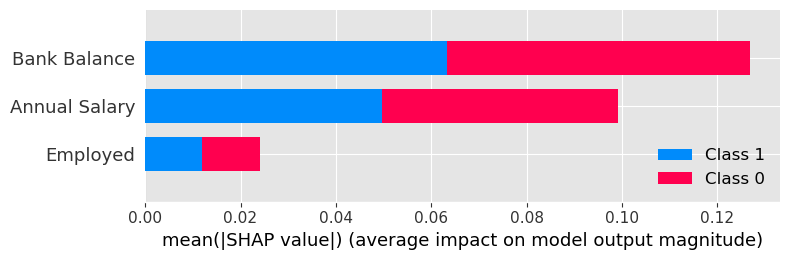

In [34]:
import shap

# Choose an appropriate value for K (number of samples)
K = 100  # Adjust this based on your needs

# Summarize the background data using shap.sample
background_summary = shap.sample(X_train, K)

# Create a SHAP KernelExplainer with the summarized background data
explainer = shap.KernelExplainer(model.predict_proba, background_summary)

# Calculate SHAP values for the testing data
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot (feature importance)
shap.summary_plot(shap_values, X_test, feature_names=X_train.columns)